# Exercise 2.5 (programming) Design and Conduct an Experiment 
- Conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. 
- Use a modified version of the 10-armed testbed
- $q_{*}(a)$ start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the $q_{*}(a)$ on each step). 
- Prepare plots like Figure 2.2 
- For an action-value method using sample averages, incrementally computed 
- Another action-value method using a constant step-size parameter, $\alpha$ = 0.1. 
- Use $\epsilon$ = 0.1 and longer runs, say of 10,000 steps.

In [110]:
import random
import matplotlib.pyplot as pl

In [111]:
ten_arm_testbed = [random.gauss(0, 0.01) for i in range(10)]

In [112]:
def argmax(Q):
    """
    Returns the argmax a Q with ties broken randomly
    """
    
    # maxvals
    max_val = float('-inf')
    
    # Keep track of ties
    ties = []
    
    # Loop through Q values 
    for i in range(len(Q)):
        
        # Q value greater than max_val
        if Q[i] > max_val:
            
            # New maximum value
            max_val = Q[i]
            
            # Clear ties
            ties.clear()
            
        # Q value equal to max_val
        if Q[i] == max_val:
            
            # Append index to ties
            ties.append(i)
    
    # Ties broken randomly
    return random.choice(ties)

In [113]:
def e_greedy(Q, epsilon):
    """
    Returns the action chosen with probability e-greedy.
    """
    
    # Greedy action 
    action = argmax(Q)
    
    # Exploratory action
    if random.random() < epsilon:
        
        # Explore
        action = random.randint(0, len(Q)-1)
        
    return action

In [114]:
def bandit(a):
    """
    Return reward signal from bandit arm pull
    """
    
    # 10-arm testbed
    global ten_arm_testbed
    
    # Step rewards for non-stationary
    ten_arm_testbed[a] += random.gauss(0, 0.01)
    
    # Pull arm and receive non-stationary reward
    return ten_arm_testbed[a]

In [115]:
def stationary(epsilon, steps, k = len(ten_arm_testbed)):
    """
    Returns sample-average method for stationary rewards
    """
    
    # Q(a) <-- 0
    Q = [0] * k
    
    # N(a) <-- 0
    N = [0] * k
    
    # Keep track of rewards
    rewards = [0]; averages = []
    
    # Loop forever:
    for step in range(steps):
        
        # Take action
        A = e_greedy(Q, epsilon)
        
        # Reward
        R = bandit(A)
        
        # Action count
        N[A] = N[A] + 1
        
        # Update Q values for old action
        Q[A] = Q[A] + (1/N[A])*(R - Q[A])
        
        # Append reward
        rewards.append(rewards[-1] + R)
        averages.append(rewards[-1] / (step + 1))
        
    return averages

In [116]:
def non_stationary(epsilon, alpha, steps, k = len(ten_arm_testbed)):
    """
    Returns Constant step-size parameter method for non-stationary rewards
    """
    
    # Q(a) <-- 0
    Q = [0] * k
    
    # N(a) <-- 0
    N = [0] * k
    
    # Keep track of rewards
    rewards = [0]; averages = []
    
    # Loop forever:
    for step in range(steps):
        
        # Take action
        A = e_greedy(Q, epsilon)
        
        # Reward
        R = bandit(A)
        
        # Action count
        N[A] = N[A] + 1
        
        # Update Q values for old action
        Q[A] = Q[A] + alpha*(R - Q[A])
        
        # Append reward
        rewards.append(rewards[-1] + R)
        averages.append(rewards[-1] / (step + 1))
        
    return averages

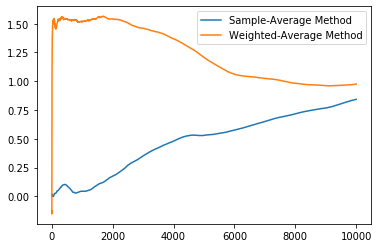

In [117]:
pl.plot(stationary(0.1, 10000), label="Sample-Average Method")
pl.plot(non_stationary(0.1, 0.1, 10000), label="Weighted-Average Method")
pl.legend()